In [24]:
import pandas as pd

In [25]:
df=pd.read_csv(r'C:\Users\50021726\Desktop\Ineuron\PytorchYT\diabetes.csv')

In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
X=df.drop(['Outcome'],axis=1).values
y=df['Outcome'].values

In [28]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [41]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [42]:
torch.manual_seed(20)
model=ANN_Model()

In [43]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [47]:
loss_function=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.01)

In [49]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optim.zero_grad()
    loss.backward()
    optim.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211888313293
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041290283203
Epoch number: 61 and the loss : 0.5410096049308777
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971307754517
Epoch number: 101 and the loss : 0.5061255693435669
Epoch number: 111 and the loss : 0.4983412027359009
Epoch number: 121 and the loss : 0.4960547685623169
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.47560378909111023
Epoch number: 151 and the loss : 0.47992369532585144
Epoch number: 161 and the loss : 0.4792938232421875
Epoch number: 171 and the loss : 0.4649999141693115
Epoch number: 181 and the loss : 0.458202600479126
Epoch number: 191 and t

In [50]:

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

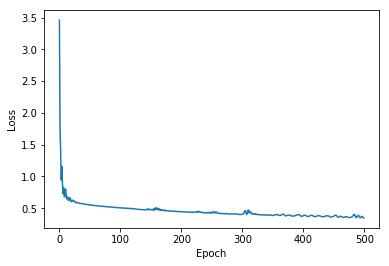

In [51]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [57]:
predictions=[]
with torch.no_grad():
    
    for i,data  in enumerate (X_test):
        y_pred=model(data)
        print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

In [62]:
cm

array([[93, 14],
       [18, 29]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)

In [64]:
score

0.7922077922077922